<h2>
    Gap-filling on GPS data sets using iterative EOF and time series analysis
</h2>
    <h4>This for the East_NZ2009.csv data set.<br></h4>
    Libraries used-<br>
    numpy<br>
    pandas<br>
    os <br>
    matplotlib <br>
    eofs.standard <br>
    random <br><br>
    An iterative algorithm, EOF analysis, has been suggested the retrieve the missing values in CGPS data. Using the data, we first construct a spatial-temporal matrix. The missing values are then initialized appropriately. The method then decomposes the constructed matrix into different EOF modes. The optimum number of EOF modes are selected such that we are able to cover maximum variability in the data. The matrix is reconstructed using the number of modes calculated. An iterative update of missing values is performed, which gives the best estimate of missing data points. To verify the correctness of this method, 1-2% of the given data has been used as the cross-validation-set, to see if the missing values can be estimated correctly or not.
    
 <h6>
    The cross validation test is done at the end
 </h6>

In [37]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from eofs.standard import Eof 
import random

In [38]:
df=pd.read_csv('East_NZ2009.csv', sep=',',header=None)       # reading the .csv files and converting to dataframe
east_matrix = np.array(df.to_numpy())                        #convert to numpy array
east_matrix = east_matrix.T                        # take transpose
m = len(east_matrix)                        #rows
n = len(east_matrix[0])                     #columns
east_matrix = np.nan_to_num(east_matrix)    #fill NaN with 0
org_matrix=east_matrix                        #store the current matrix as or
print(east_matrix)
print(m)
print(n)

[[  -4.13   -3.62   -3.97 ...   45.87   45.81   47.1 ]
 [   0.      0.      0.   ...   20.93   20.11   19.46]
 [  91.18   93.82   95.17 ... -137.53 -137.49 -136.58]
 ...
 [   0.      0.      0.   ...  228.64  229.2   230.53]
 [   0.      0.      0.   ...  -66.19  -66.97  -66.69]
 [   0.      0.      0.   ... -101.33 -100.89 -100.68]]
99
4291


In [39]:
"""
Subtracting the spatial mean from each column. The mean is stored in an array so that it can be added later
"""
l=[]
for j in range(n):
    sum=0.0
    count=0
    for i in range(m):
        sum+=east_matrix[i][j]
        count+=1
    sum/=count
    l.append(sum)
    for i in range(m):
        if(east_matrix[i][j]!=0):
            east_matrix[i][j]-=sum

In [40]:
"""
Example of reconstructing the matrix using 12 components
"""
solver = Eof(east_matrix) 
components=12
pcs=solver.pcs(pcscaling = 0 , npcs=components)
eofs=solver.eofs(eofscaling = 0, neofs=components)
new_matrix = np.matmul(pcs,eofs)  
print(new_matrix)

[[-48.5848848  -48.54741576 -48.57275405 ...  99.90147161  99.58836253
   99.80341608]
 [ -3.6553062   -3.12008263  -3.32874435 ...  73.3312275   73.15484367
   73.38873183]
 [ 36.14581544  35.58984589  36.04639022 ... -84.13218536 -83.94526463
  -83.96110547]
 ...
 [ -1.23360915  -1.46339503  -1.45331129 ... 283.23795627 282.63465703
  283.62697289]
 [ -9.1903738   -5.26136653  -8.07794489 ...  -6.61232727  -7.38226314
   -7.61154249]
 [ -9.25998385  -8.27488974  -8.91735121 ... -41.42499636 -41.94304398
  -41.88317319]]


In [41]:
eigenvalues =  solver.varianceFraction()
eigenvalue1 = solver.varianceFraction(neigs=99)

In [42]:
print(eigenvalue1.shape) #shape of numpy array for 99 components

(99,)


In [43]:
sum=0.0
for i in range(len(eigenvalue1)):
    sum+=eigenvalue1[i]
print(sum)   #total variance- will be 1.00

0.9999999999999996


In [44]:
"""
finding the % of variance explained by each component 
"""
for i in range(len(eigenvalue1)):  
    eigenvalue1[i]*=100
    eigenvalue1[i]/=sum
x=np.round(eigenvalue1,decimals=3)
print(x) # 10 components seems to be enough to cover the variance

[7.3034e+01 1.8357e+01 4.0750e+00 2.0330e+00 7.8900e-01 4.0500e-01
 2.6600e-01 2.0800e-01 1.8200e-01 1.0800e-01 7.3000e-02 5.5000e-02
 4.6000e-02 4.1000e-02 3.6000e-02 3.4000e-02 3.1000e-02 2.6000e-02
 1.9000e-02 1.7000e-02 1.6000e-02 1.4000e-02 1.3000e-02 1.0000e-02
 9.0000e-03 8.0000e-03 7.0000e-03 6.0000e-03 6.0000e-03 6.0000e-03
 5.0000e-03 4.0000e-03 4.0000e-03 4.0000e-03 3.0000e-03 3.0000e-03
 3.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03
 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 1.0000e-03
 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03
 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03
 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000

7.8187468950410945


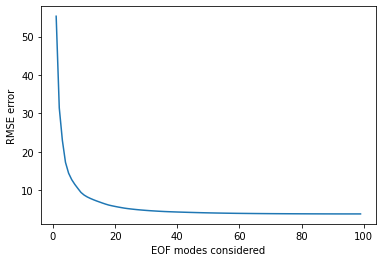

In [45]:
"""
plotting the RMSE error  after constructing the matrix with k components vs the number of EOF modes considered
"""
x_components=[]
y_error=[]
for k in range(99):
    totalerror=0.0
    pcs=solver.pcs(pcscaling = 0 , npcs=k+1)
    eofs=solver.eofs(eofscaling = 0, neofs=k+1)
    new_matrix = np.matmul(pcs,eofs)  
    for i in range(m):
        for j in range(n):
            totalerror+=(east_matrix[i][j]-new_matrix[i][j])**2
    x_components.append(k+1)
    y_error.append((totalerror/(m*n))**0.5)
plt.xlabel("EOF modes considered")
plt.ylabel("RMSE error")
plt.plot(x_components,y_error)
print(y_error[11])            #error for 12 components

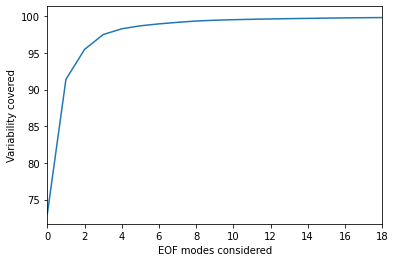

In [46]:
"""
plotting the variance expressed vs the no. of EOF modes considered
"""
variance_covered=0.0
y=[]
x=[]
for i in range(99):
    variance_covered+=eigenvalue1[i]
    y.append(variance_covered)
    x.append(i)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
scale_factor=18
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.xlabel("EOF modes considered")
plt.ylabel("Variability covered")
plt.plot(x,y)
#plot of variance covered v/s the number of components taken. we see graph flats out at approx 10-15 components.
#so we'll fix number of components to 12

In [47]:
print(east_matrix) #after subtracting the spatial mean from the original matrix

[[-38.21474747 -38.33474747 -38.24767677 ...  95.14757576  94.40323232
   95.01909091]
 [  0.           0.           0.         ...  70.20757576  68.70323232
   67.37909091]
 [ 57.09525253  59.10525253  60.89232323 ... -88.25242424 -88.89676768
  -88.66090909]
 ...
 [  0.           0.           0.         ... 277.91757576 277.79323232
  278.44909091]
 [  0.           0.           0.         ... -16.91242424 -18.37676768
  -18.77090909]
 [  0.           0.           0.         ... -52.05242424 -52.29676768
  -52.76090909]]


In [48]:
"""
Refining the matrix obtained after reconstructing with 12 EOF modes.
beta value (value for convergence) has been set to 1e-6. 
You can decrease it if you want a more refined value
"""
temp_matrix=org_matrix
comp_considered=12
for k in range(comp_considered):
    while(1):
        solver=Eof(temp_matrix)
        pcs=solver.pcs(pcscaling=0,npcs=k+1)
        eofs=solver.eofs(eofscaling=0,neofs=k+1)
        x_ = np.matmul(pcs,eofs)
        for i in range(m):
            for j in range(n):
                if(org_matrix[i][j] != 0):
                    x_[i][j]=org_matrix[i][j]
        error=x_ - temp_matrix
        error=np.square(error)
        var1=np.sum(error)
        error2=np.square(x_)
        var2=np.sum(error2)
        temp_matrix=x_
        print(k+1, var1/var2)
        if(var1/var2 < 0.000001):
            break
print(temp_matrix)

1 0.009836983730853415
1 0.0013918586037670166
1 0.0005363640966186826
1 0.00029925119480459417
1 0.00020116209502872839
1 0.0001473434692264715
1 0.00011204312991915318
1 8.676007340299332e-05
1 6.794105564323734e-05
1 5.368602873778036e-05
1 4.278348591884779e-05
1 3.438674466245985e-05
1 2.7879654026599973e-05
1 2.2805913477641384e-05
1 1.88246917916754e-05
1 1.5680034530973698e-05
1 1.3178899389350711e-05
1 1.1175115894294396e-05
1 9.557578283048026e-06
1 8.241512075052337e-06
1 7.161988574752408e-06
1 6.269090597711493e-06
1 5.524295603252366e-06
1 4.897759695652328e-06
1 4.366270778354279e-06
1 3.911700651481193e-06
1 3.519830555072794e-06
1 3.1794572634613334e-06
1 2.8817106935222585e-06
1 2.6195315155890967e-06
1 2.3872701836585117e-06
1 2.1803783776772945e-06
1 1.9951709736461384e-06
1 1.8286419769328905e-06
1 1.6783218425627752e-06
1 1.5421666074758378e-06
1 1.418471525929539e-06
1 1.3058036158291836e-06
1 1.2029488279516294e-06
1 1.1088705434778183e-06
1 1.022676863931638e-0

6 7.802896188977662e-06
6 6.336553202171437e-06
6 5.403411999330817e-06
6 4.732038993869694e-06
6 4.213095521127931e-06
6 3.7939063104028663e-06
6 3.4453669231960496e-06
6 3.1496260876801367e-06
6 2.8948557398340434e-06
6 2.6727655804796224e-06
6 2.477300256247552e-06
6 2.3038971705631496e-06
6 2.1490337960252842e-06
6 2.0099361249750935e-06
6 1.8843827265461663e-06
6 1.7705686109507785e-06
6 1.6670081447624707e-06
6 1.5724643513633809e-06
6 1.4858965286543473e-06
6 1.4064208602677118e-06
6 1.3332804057230449e-06
6 1.2658219588190074e-06
6 1.2034779983229557e-06
6 1.1457524562085997e-06
6 1.0922093773001649e-06
6 1.0424637904986245e-06
6 9.961742879573657e-07
7 6.085274847995427e-06
7 2.9509959630756316e-06
7 2.2267647460708444e-06
7 1.8838512628704014e-06
7 1.6750220474515644e-06
7 1.527597536712366e-06
7 1.4132012706950643e-06
7 1.3188803496457497e-06
7 1.2380290698671855e-06
7 1.16694836316618e-06
7 1.1033843625117685e-06
7 1.0458571959728386e-06
7 9.933322456537509e-07
8 1.02856376

In [49]:
print(org_matrix) #orginal matrix with missing values

[[-38.21474747 -38.33474747 -38.24767677 ...  95.14757576  94.40323232
   95.01909091]
 [  0.           0.           0.         ...  70.20757576  68.70323232
   67.37909091]
 [ 57.09525253  59.10525253  60.89232323 ... -88.25242424 -88.89676768
  -88.66090909]
 ...
 [  0.           0.           0.         ... 277.91757576 277.79323232
  278.44909091]
 [  0.           0.           0.         ... -16.91242424 -18.37676768
  -18.77090909]
 [  0.           0.           0.         ... -52.05242424 -52.29676768
  -52.76090909]]


In [50]:
for i in range(m):
    for j in range(n):
        temp_matrix[i][j]+=l[j]
print(temp_matrix) #reconstructed and refined dataset after applying iterative EOF analysis

[[  -4.13         -3.62         -3.97       ...   45.87
    45.81         47.1       ]
 [   9.53246624   11.30518262   10.11197996 ...   20.93
    20.11         19.46      ]
 [  91.18         93.82         95.17       ... -137.53
  -137.49       -136.58      ]
 ...
 [-161.49526551 -162.34669727 -162.82839459 ...  228.64
   229.2         230.53      ]
 [ 334.81124974  333.70642382  334.7267734  ...  -66.19
   -66.97        -66.69      ]
 [ 359.86403973  359.76077965  360.0841639  ... -101.33
  -100.89       -100.68      ]]


<h2> The assignment ends here.</h2>
<h4>
    Below is a test on the cross validation set showing the correctness of the EOF based gap filling method.
</h4>


   A submatrix of size 10 * 10 is taken from the original data set and 10 values are randomly set to 0.
   Number of ideal components are select to express maximum variance.
   The iterative refinement is done and finally the obtained values are compared with the original values.

-beta is set to 1e-06<br>
-number of components to cover maximum variance is taken to be 3

In [51]:
cross_valid_set=np.zeros((10,10))
new_org_matrix=np.zeros((10,10))
t=[]
for i in range(10):
    for j in range(10):
        cross_valid_set[i][j]=org_matrix[i][j]
        new_org_matrix[i][j]=org_matrix[i][j]
for i in range(10):
    a=random.randint(0,4)
    b=random.randint(0,4)
    t.append((a,b))
    new_org_matrix[a][b]=0
    cross_valid_set[a][b]=0
print(cross_valid_set)

[[   0.            0.          -38.24767677  -39.04121212    0.
   -39.07262626  -37.87131313  -38.59212121  -40.12727273  -38.63434343]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [  57.09525253    0.           60.89232323    0.           64.62656566
    52.57737374   63.08868687   53.87787879   55.44272727   62.89565657]
 [ 114.02525253  112.63525253  114.76232323  113.78878788  113.21656566
   113.49737374  116.36868687  113.84787879  113.32272727  112.64565657]
 [   0.           56.97525253    0.            0.           58.45656566
    52.90737374   68.25868687   70.97787879   57.88272727   57.50565657]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [ 190.03525253  190.08525253  189.40232323  187.16878788  187.70656566
   189.30737374  188.89868687  189.07787879  189.80272727  190.59565657]
 [  75.31

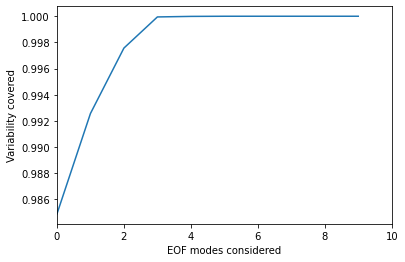

In [52]:
solver=Eof(cross_valid_set)
eigenvalues =  solver.varianceFraction()
eigenvalue1 = solver.varianceFraction(neigs=99)
variance_covered=0.0
y=[]
x=[]
for i in range(len(eigenvalue1)):
    variance_covered+=eigenvalue1[i]
    y.append(variance_covered)
    x.append(i)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
scale_factor=10
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.xlabel("EOF modes considered")
plt.ylabel("Variability covered")
plt.plot(x,y)

In [53]:
temp_matrix= cross_valid_set
comp_considered=3
for k in range(comp_considered):
    while(1):
        solver=Eof(temp_matrix)
        pcs=solver.pcs(pcscaling=0,npcs=k+1)
        eofs=solver.eofs(eofscaling=0,neofs=k+1)
        x_ = np.matmul(pcs,eofs)
        for i in range(5):
            for j in range(5):
                if(new_org_matrix[i][j] != 0):
                    x_[i][j]=new_org_matrix[i][j]
        error=x_ - temp_matrix
        error=np.square(error)
        var1=np.sum(error)
        error2=np.square(x_)
        var2=np.sum(error2)
        temp_matrix=x_
        #print(k+1, var1/var2)
        #print(x_[10][35])
        
        if(var1/var2 < 0.000001):
            break
print(temp_matrix)

[[ -38.91110393  -39.49884624  -38.24767677  -39.04121212  -40.61421037
   -35.73359726  -36.04920345  -35.7656248   -35.81846722  -36.16052432]
 [ -40.90033574  -41.37804935  -41.81518616  -41.00793684  -42.45085675
   -37.61876006  -37.95101639  -37.65247725  -37.70810742  -38.0682101 ]
 [  57.09525253   60.88227654   60.89232323   58.43774434   64.62656566
    54.72334997   55.20667742   54.77239777   54.85332201   55.37715705]
 [ 114.02525253  112.63525253  114.76232323  113.78878788  113.21656566
   103.03236257  103.94236477  103.1247091   103.27707212  104.26334145]
 [  55.61730514   56.97525253   56.38565184   55.78632459   58.45656566
    51.37296122   51.82669737   51.41900611   51.49497583   51.98673953]
 [ -40.90033574  -41.37804935  -41.81518616  -41.00793684  -42.45085675
   -37.61876006  -37.95101639  -37.65247725  -37.70810742  -38.0682101 ]
 [ 154.70481258  155.82412275  156.33871832  154.67212459  159.33210022
   141.66799761  142.91923738  141.79497274  142.00446967 

In [54]:
for i in range(len(t)):
    if(org_matrix[t[i][0]][t[i][1]]!=0): #don't consider values which were missing in the original data set.
        print(org_matrix[t[i][0]][t[i][1]]+l[t[i][1]] , temp_matrix[t[i][0]][t[i][1]]+l[t[i][1]])

-3.6199999999999974 -4.784098765907785
92.88 90.64753671248383
-4.130000000000003 -4.82635645171959
98.79 93.29895646599451
93.82 95.59702401031106
96.86 90.66332861085803
99.31 89.70205261299344
-4.899999999999999 -6.040776025401996
99.31 89.70205261299344
